In [1]:
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-x0g_4k7c
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-x0g_4k7c
  Resolved https://github.com/huggingface/diffusers to commit 53a10518b9a5ac998d9ed40ae3f3edcaa4eadd89
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4273379 sha256=77354cfa6cc67d07a78e2069fbec74252150fe341bcb6ee58421a11495fa2668
  Stored in directory: /tmp/pip-ephem-wheel-cache-i13b_tza/wheels/90/d4/44/a58bc00fb405fefb633b0d9d2307f6e3aec6cc1775d82555d3
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.1
    Uninstalling diffusers-0.35.1:
      Successfully uninstalled diffusers-0.35.1


In [2]:
from diffusers import StableDiffusionXLPipeline
import torch
from transformers.pipelines.image_to_text import Image
from IPython.display import display

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [4]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B",
                                                 torch_dtype=torch.float16,
                                                 use_safetensors=True,
                                                 variant="fp16")


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/2.66G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [5]:
pipe.to("cuda")

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.36.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [9]:
prompt= "people going on market market time is dewali festivals , shpos are attractive desgins"
neg_prompt="ugly"

In [10]:
image = pipe(prompt = prompt,
             neg_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

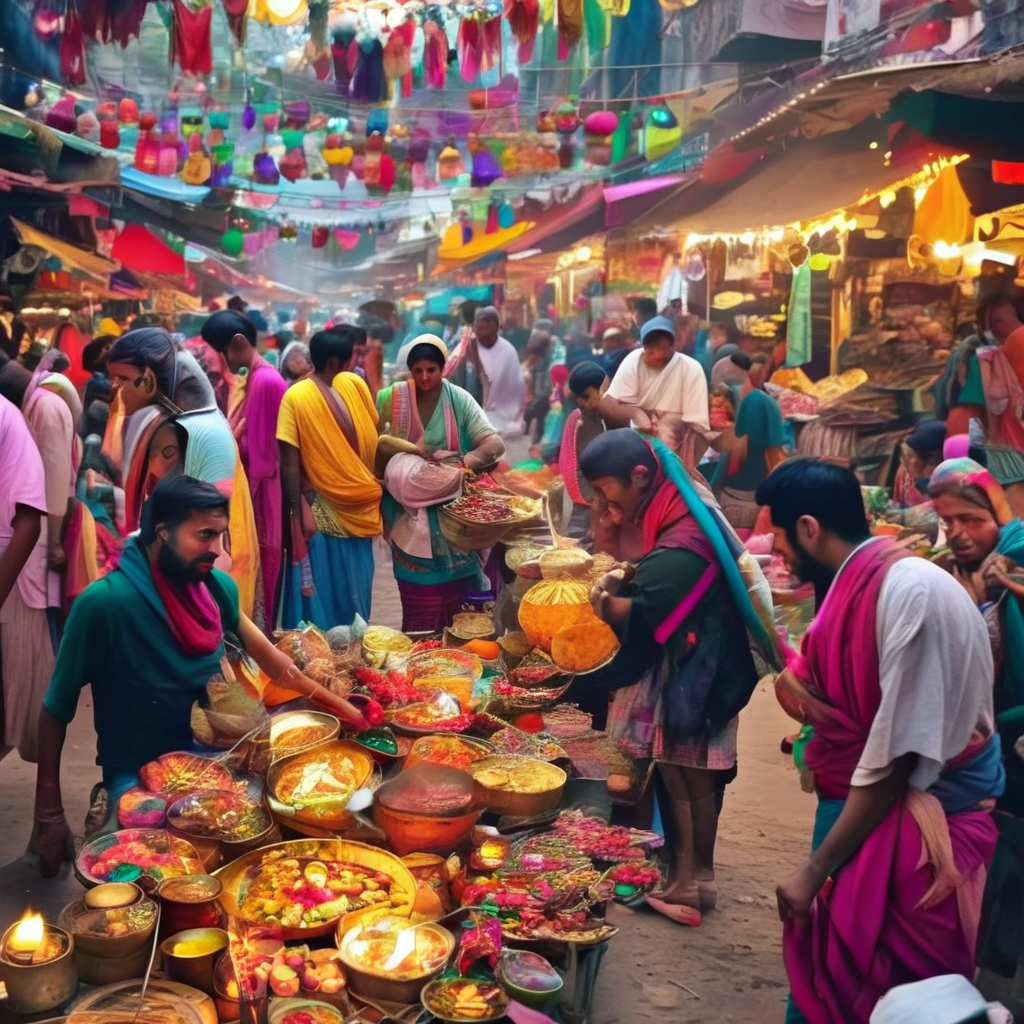

In [11]:
display(image)